In [1]:
import random

from PIL import ImageDraw, ImageFont, ImageFilter

from keyrover import *
from keyrover.effects import *
from keyrover.color import *

2024-11-02 17:16:41.520 Python[81938:4794130] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


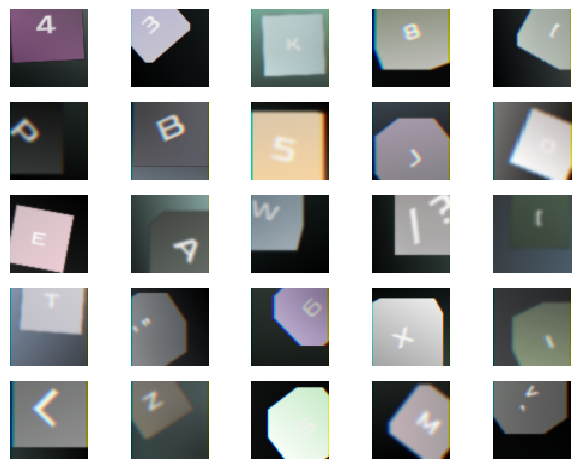

In [18]:
fonts = [ImageFont.truetype("assets/font/goldman/Goldman-Regular.ttf", size)
         for size in range(18, 28, 2)]


keys = []

letters = list("QWERTYUIOPASDFGHJKLZXCVBNM0123456789[]")
letters += ["' \"", ": ;", "[", "/ ?", ", <", ". >"]

for letter in random.sample(letters, k=25):
    # picking colors
    
    foreground1 = random_hsv(s_lims=(0.0, 0.2), v_lims=(0.3, 1))
    
    foreground2 = foreground1.copy()
    foreground2.value = min(1, max(0, foreground2.value + random.uniform(-0.5, 0.5)))
    foreground2.saturation = min(1, max(0, foreground2.saturation + random.uniform(-0.2, 0.2)))
    
    foreground1 = foreground1.to_rgb()
    foreground2 = foreground2.to_rgb()
    
    background1 = random_hsv(h_lims=(144, 216), s_lims=(0.0, 0.3), v_lims=(0.0, 0.3))
    
    background2 = background1.copy()
    background2.value = min(1, max(0, background2.value + random.uniform(-0.5, 0.5)))
    background2.saturation = min(1, max(0, background2.saturation + random.uniform(-0.2, 0.2)))

    background1 = background1.to_rgb()
    background2 = background2.to_rgb()
    
    text_color = random_grey(lims=(240, 255), alpha_lims=(0.9, 1))
    
    # creating the key image
    
    key = gradient_image((64, 64), [foreground1, foreground2], random.randint(0, 360))
    key = key.convert("RGBA")
    img = gradient_image((64, 64), [background1, background2], random.randint(0, 360))

    draw = ImageDraw.Draw(key)
    draw.text((32, 32), letter, font=random.choice(fonts), anchor="mm", fill=tuple(text_color))

    key = apply_random_affine(key, scale_lims=(0.75, 1.5), angle_lims=(-50, 50), translation_lims=(3, 3))
    key = img_to_PIL(key)
    
    img.paste(key, mask=key)

    img = img.filter(ImageFilter.GaussianBlur(radius=random.uniform(0, 1.5)))
    img = add_chromatic_aberration(img, strength=random.uniform(0, 0.04))
    img = add_soft_shadow(img) if random.random() < 0.5 else img
    
    keys.append(img)

show_images(keys)